____
__Universite de Technologie de Troyes__<br/>
__Universidad Tecnologica Nacional Buenos Aires__<br/>
__Master OSS__<br/>
__Machine Learning & Pattern Recognition__<br/>
__Practice Sessions__<br/>
__Teacher: Martin Palazzo__
____

# Import Libraries

Import useful libraries mainly Numpy for calculus and Seaborn and Matplotlib for visualization.

In [96]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_context("talk", font_scale=0.85)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes
from sklearn import datasets
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_squared_error

# Import Datasets

#### Import multi-variate regression data

In [66]:
# first import data for regression
boston = datasets.load_boston()
#data = datasets.make_friedman3(n_samples=1000, noise=5.0, random_state=None)

In [67]:
# define the independient variables
x = boston.data
# define the dependen variables (labels)
y = boston.target

In [68]:
# visualization of the first 20 values of y
y[:20]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


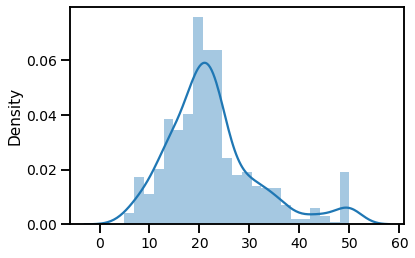

In [69]:
# distplot of label distribution
sns.distplot(y)

In [70]:
# check the dimensionality and samples of the dataset
np.shape(x)

(506, 13)

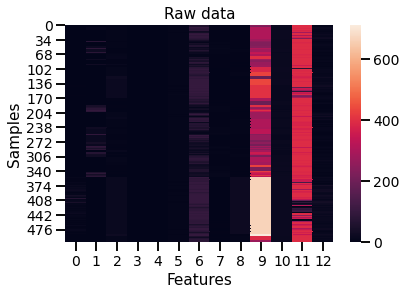

In [71]:
# print the x matrix
sns.heatmap(x)
plt.title('Raw data')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.show()

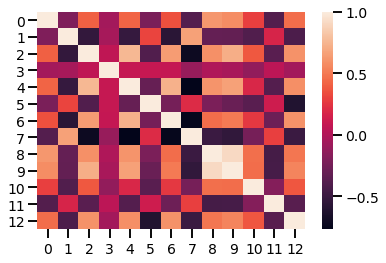

In [72]:
# Feature pairwise linear correlation
sns.heatmap(pd.DataFrame(x).corr())
plt.show()

# **Train-test split**

In [73]:
# train test split
xtr0, xte0, ytr, yte = train_test_split(x,y,test_size=0.3, random_state = 10)

In [74]:
scaler = StandardScaler()

In [75]:
# get the mean and standard deviation of every feature
scaler.fit(xtr0)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [76]:
# scale each feature using the mean and std-dev in the previous step
xtr = scaler.transform(xtr0)
xte = scaler.transform(xte0)

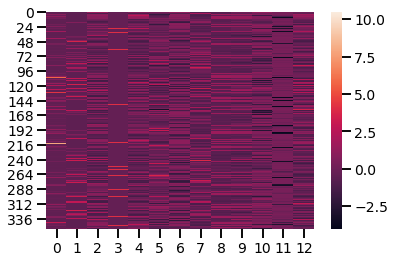

In [77]:
# print the x matrix
sns.heatmap(xtr)

In [78]:
np.mean(xtr, axis = 0)

array([-1.34387166e-16,  7.27603790e-17,  4.64286487e-15,  2.15772158e-16,
       -2.36063523e-15,  1.95951228e-15,  2.05101159e-15, -1.25135307e-16,
       -3.79483011e-17, -5.64520182e-18,  1.90105308e-14,  4.20300957e-15,
        3.91087037e-16])

In [79]:
np.std(xtr)

1.0000000000000002

In [80]:
#xtr

### **Train validation split**

In [81]:
from sklearn.model_selection import KFold

In [82]:
kf = KFold(n_splits=5)
kf.get_n_splits(xtr)

5

In [83]:
train_index, val_index = next(kf.split(xtr))
xtra = xtr[train_index]
xval = xtr[val_index]

ytra = ytr[train_index]
yval = ytr[val_index]

In [84]:
xtra.shape

(283, 13)

In [85]:
xval.shape

(71, 13)

# **Linear Regression**

In [89]:
def linear_regression(x, y):

  'Ridge regression method to obtain feature parameters using the regularization term'

  x_tran = np.transpose(x)
  xtransx = np.dot(x_tran, x)
  if xtransx.shape[0] != xtransx.shape[1]:
      raise ValueError('Needs to be a square matrix for inverse')
  #lamidentity = np.identity(xtransx.shape[0]) * lamb
  matinv = np.linalg.inv(xtransx)
  xtransy = np.dot(x_tran, y)
  weights = np.dot(matinv, xtransy)

  return weights

In [90]:
def lin_reg(x,y):
  n, m = x.shape
  I = np.identity(m)
  w = np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), y)
  return w

In [91]:
# Visualize the weights obtained
weights_ols = lin_reg(xtra,ytra)
weights_ols

array([-0.75358976,  2.74032723,  0.43594183,  0.27291687, -0.69509366,
        2.51633168, -1.23015119, -4.23115586,  2.5778356 , -2.62370762,
       -0.9062409 ,  1.57266438, -3.43169149])

In [92]:
# compute the L2 norm of the weights vector
np.linalg.norm(weights_ols, ord = 2)

7.948143322434163

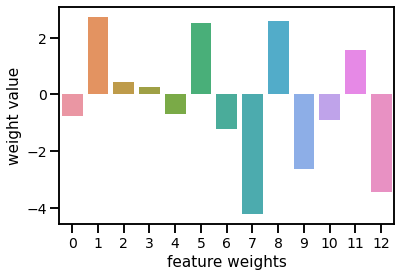

In [93]:
sns.barplot(x = np.arange(0,np.shape(weights_ols)[0]), y = weights_ols)
plt.xlabel('feature weights')
plt.ylabel('weight value')
plt.show()

In [94]:
# compute the estimation of y using the obtained weights
y_pred_val_ols = np.dot(xval, np.asarray(weights_ols))

In [99]:
rmse_ols = np.sqrt(np.mean(np.square(yval - y_pred_val_ols)))
rmse_ols

22.4670955381426

# Ridge Regression

In [100]:

def ridge_regression(x, y, labd):

  'Ridge regression method to obtain feature parameters using the regularization term'

  x_tran = np.transpose(x)
  xtransx = np.dot(x_tran, x)
  if xtransx.shape[0] != xtransx.shape[1]:
      raise ValueError('Needs to be a square matrix for inverse')
  lamidentity = np.identity(xtransx.shape[0]) * lamb
  matinv = np.linalg.inv(lamidentity + xtransx)
  xtransy = np.dot(x_tran, y)
  weights = np.dot(matinv, xtransy)

  return weights

In [101]:
def ridge_reg(x,y,lambd):
  n, m = x.shape
  I = np.identity(m)
  w = np.dot(np.dot(np.linalg.inv(np.dot(x.T, x) + lambd * I), x.T), y)
  return w

In [102]:
# select lambda values
lamb = 30

In [103]:
# Visualize the weights obtained
weights = ridge_reg(xtra,ytra, lamb)
weights

array([-0.53761896,  1.94592755,  0.03616543,  0.36180607, -0.30293686,
        2.68252418, -1.01240137, -2.82583646,  1.0571608 , -1.08332124,
       -0.94175696,  1.40971763, -3.02808432])

In [104]:
# compute the L2 norm of the weights vector
np.linalg.norm(weights, ord = 2)

5.902590378379027

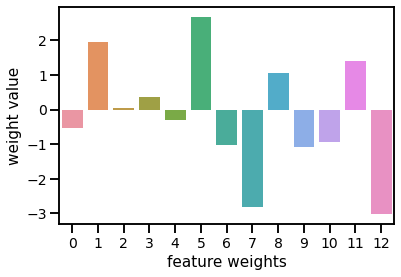

In [105]:
sns.barplot(x = np.arange(0,np.shape(weights)[0]), y = weights)
plt.xlabel('feature weights')
plt.ylabel('weight value')
plt.show()

In [106]:
# change the format of the weights vector
weights_array = np.asarray(weights)
weights_array

array([-0.53761896,  1.94592755,  0.03616543,  0.36180607, -0.30293686,
        2.68252418, -1.01240137, -2.82583646,  1.0571608 , -1.08332124,
       -0.94175696,  1.40971763, -3.02808432])

In [107]:
np.shape(weights_array)

(13,)

In [108]:
# compute the estimation of y using the obtained weights
y_pred_val = np.dot(xval, weights_array)

In [109]:
# check the dimensionality of the estimation of y
np.shape(y_pred_val)

(71,)

In [110]:
# compute the MSE 
RMSE = np.sqrt(np.mean(np.square(yval - y_pred_val)))
RMSE

22.360473245668455

# **Excercise: Ridge Regression Regularization Path**
- Define which value of lambda reduces more the RMSE
- plot a RMSE curve given different values of lambda hyper-parameter



In [111]:
##### Define which value of lambda reduces more the RMSE ###### 
##### plot a RMSE curve given different values of lambda hyper-parameter #####

In [112]:
xtr.shape

(354, 13)

In [113]:
# 
iterations = 1000
rmse = np.zeros(iterations)
weight_path = np.zeros((iterations,xtr.shape[1]))
for i in range(1, iterations+1, 1):
  lamb = i
  weight_path[i-1,:] = ridge_reg(xtra,ytra, lamb)
  y_pred_val_i = np.dot(xval, np.asarray(weight_path[i-1,:]))
  rmse[i-1] = np.sqrt(np.mean(np.square(yval - y_pred_val_i)))

In [114]:
weight_path.shape

(1000, 13)

[]

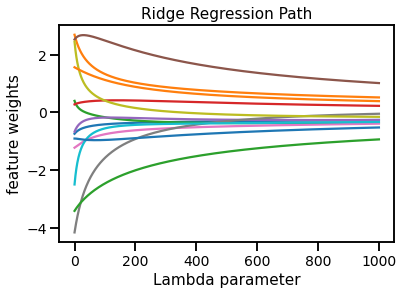

In [129]:
plt.plot(weight_path[:,0])
plt.plot(weight_path[:,1])
plt.plot(weight_path[:,2])
plt.plot(weight_path[:,3])
plt.plot(weight_path[:,4])
plt.plot(weight_path[:,5])
plt.plot(weight_path[:,6])
plt.plot(weight_path[:,7])
plt.plot(weight_path[:,8])
plt.plot(weight_path[:,9])
plt.plot(weight_path[:,10])
plt.plot(weight_path[:,11])
plt.plot(weight_path[:,12])
plt.xlabel('Lambda parameter')
plt.ylabel('feature weights')
plt.title('Ridge Regression Path')
plt.plot()

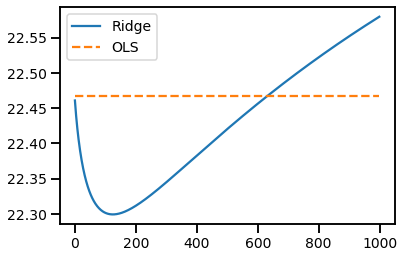

In [128]:
plt.plot(rmse, label = 'Ridge')
plt.plot(np.full((1000),rmse_ols), '--', label = 'OLS')
plt.legend()
plt.show()

In [ ]:
np.mean(np.square(yval - y_pred_val_i))

509.83509982878604

In [ ]:
mean_squared_error(yval, y_pred_val_i)

509.83509982878604